In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#network based intrution detection system
import pandas as pd
import numpy as np
import struct
import socket
import math
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:

df=pd.read_csv("/content/drive/MyDrive/final.csv")
df

<ipython-input-5-2327ebc95654>:1: DtypeWarning: Columns (13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/final.csv")


,Timestamp,Event Id,Sid,Signature title,Protocol,Src IP,Src Port,Dst IP,Dst Port,Type,...,Ethernet Type,Flags,Sequence Number,Ack Number,Window Size,TTL,IP header Length,Total Length,Total Packet,Window size in Bytes
0,08/12-14:36:18.615390,1.0,10000001.0,DDoS TCP Syn Flood attack,TCP,11.49.174.221,8418.0,10.10.10.30,80.0,1.0,...,0xAE,******S*,0x6127343,0x251CFB75,0x40,64.0,0.0,30899.0,160.0,163840.0
1,08/12-14:36:18.615831,1.0,10000001.0,DDoS TCP Syn Flood attack,TCP,161.108.249.221,8419.0,10.10.10.30,80.0,1.0,...,0xAE,******S*,0x7E811960,0x49F0BA55,0x40,64.0,0.0,29448.0,160.0,163840.0
2,08/12-14:36:18.616459,1.0,10000001.0,DDoS TCP Syn Flood attack,TCP,89.95.7.237,8420.0,10.10.10.30,80.0,1.0,...,0xAE,******S*,0x7C17155F,0x6D21A624,0x40,64.0,0.0,31725.0,160.0,163840.0
3,08/12-14:36:18.616459,1.0,10000001.0,DDoS TCP Syn Flood attack,TCP,231.157.174.10,8421.0,10.10.10.30,80.0,1.0,...,0xAE,******S*,0x632F0387,0x2645718C,0x40,64.0,0.0,4446.0,160.0,163840.0
4,08/12-14:36:18.616842,1.0,10000001.0,DDoS TCP Syn Flood attack,TCP,54.237.97.145,8422.0,10.10.10.30,80.0,1.0,...,0xAE,******S*,0x3676F08D,0x6BB40F5D,0x40,64.0,0.0,60079.0,160.0,163840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626792,09/19-13:56:16.490186,1.0,10000003.0,Normal TCP Traffic,TCP,10.10.10.20,10000.0,10.10.10.30,60876.0,0.0,...,0x42,***A****,0x48FC4162,0x101A3E4B,0xFF3,64.0,0.0,33093.0,52.0,53248.0
1626793,09/19-13:56:16.491532,1.0,10000003.0,Normal TCP Traffic,TCP,10.10.10.20,10000.0,10.10.10.30,60876.0,0.0,...,0x42,***A****,0x48FC4162,0x101A40CF,0xFF3,64.0,0.0,33094.0,52.0,53248.0
1626794,09/19-13:56:16.492721,1.0,10000003.0,Normal TCP Traffic,TCP,10.10.10.20,10000.0,10.10.10.30,60876.0,0.0,...,0x42,***A****,0x48FC4162,0x101A4353,0xFF3,64.0,0.0,33095.0,52.0,53248.0
1626795,09/19-13:56:16.492721,1.0,10000003.0,Normal TCP Traffic,TCP,10.10.10.20,10000.0,10.10.10.30,60876.0,0.0,...,0x42,***A****,0x48FC4162,0x101A48FB,0xFEC,64.0,0.0,33096.0,52.0,53248.0


In [ ]:
#check for column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626797 entries, 0 to 1626796
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Timestamp                1626797 non-null  object 
 1   Event Id                 1626797 non-null  float64
 2   Sid                      1626797 non-null  float64
 3   Signature title          1626797 non-null  object 
 4   Protocol                 1626797 non-null  object 
 5   Src IP                   1626797 non-null  object 
 6   Src Port                 1626797 non-null  float64
 7   Dst IP                   1626797 non-null  object 
 8   Dst Port                 1626797 non-null  float64
 9   Type                     1626797 non-null  float64
 10  Source MAC address       1626797 non-null  object 
 11  Destination MAC address  1626797 non-null  object 
 12  Ethernet Type            1626797 non-null  object 
 13  Flags                    1068744 non-null 

In [ ]:
#remove unwanted columns
new_df=df.drop(['Timestamp','Sid','Source MAC address','Destination MAC address','Ethernet Type','Flags','Sequence Number','Ack Number','Window Size'],axis=1)
#new_df

In [ ]:
#check for length
print(len(new_df))


1626797


In [ ]:
#check for missing values and find their number
new_df.isna().sum()

,0
Event Id,0
Signature title,0
Protocol,0
Src IP,0
Src Port,0
Dst IP,0
Dst Port,0
Type,0
TTL,0
IP header Length,0


In [ ]:
#again check for column info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626797 entries, 0 to 1626796
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Event Id              1626797 non-null  float64
 1   Signature title       1626797 non-null  object 
 2   Protocol              1626797 non-null  object 
 3   Src IP                1626797 non-null  object 
 4   Src Port              1626797 non-null  float64
 5   Dst IP                1626797 non-null  object 
 6   Dst Port              1626797 non-null  float64
 7   Type                  1626797 non-null  float64
 8   TTL                   1626797 non-null  float64
 9   IP header Length      1626797 non-null  float64
 10  Total Length          1626797 non-null  float64
 11  Total Packet          1626797 non-null  float64
 12  Window size in Bytes  1626797 non-null  float64
dtypes: float64(9), object(4)
memory usage: 161.3+ MB


In [ ]:
#initialize a function to change the data type of IP addresses
def ip_to_int(ip):
    return struct.unpack("!I", socket.inet_aton(ip))[0]

new_df['Src IP']=new_df['Src IP'].apply(ip_to_int)
new_df['Dst IP']=new_df['Dst IP'].apply(ip_to_int)

In [ ]:
#check for column info
#as the IP addresses are now converted into integer so are now ready to preceed further
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626797 entries, 0 to 1626796
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Event Id              1626797 non-null  float64
 1   Signature title       1626797 non-null  object 
 2   Protocol              1626797 non-null  object 
 3   Src IP                1626797 non-null  int64  
 4   Src Port              1626797 non-null  float64
 5   Dst IP                1626797 non-null  int64  
 6   Dst Port              1626797 non-null  float64
 7   Type                  1626797 non-null  float64
 8   TTL                   1626797 non-null  float64
 9   IP header Length      1626797 non-null  float64
 10  Total Length          1626797 non-null  float64
 11  Total Packet          1626797 non-null  float64
 12  Window size in Bytes  1626797 non-null  float64
dtypes: float64(9), int64(2), object(2)
memory usage: 161.3+ MB


In [ ]:
#check for the unique values in other columns
count=new_df['Signature title'].value_counts()
print(count)

Signature title
Normal TCP Traffic           723714
UDP Flood attack             129907
 TCP Reset attack            123324
LAND attack                  120023
DNS Flood attack             119996
ICMP Flood attack            105676
smurf attack                 102212
DDoS TCP Syn Flood attack    101683
Ping of Death attack         100262
Name: count, dtype: int64


In [ ]:
  df2=new_df

In [ ]:
df2["Type"].unique()

array([1., 0.])

In [ ]:
df2['Protocol'].unique()

array(['TCP', 'UDP', 'ICMP'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df2['Protocol']=encode.fit_transform(df2['Protocol'])
df2


,Event Id,Signature title,Protocol,Src IP,Src Port,Dst IP,Dst Port,Type,TTL,IP header Length,Total Length,Total Packet,Window size in Bytes
0,1.0,DDoS TCP Syn Flood attack,1,187805405,8418.0,168430110,80.0,1.0,64.0,0.0,30899.0,160.0,163840.0
1,1.0,DDoS TCP Syn Flood attack,1,2708273629,8419.0,168430110,80.0,1.0,64.0,0.0,29448.0,160.0,163840.0
2,1.0,DDoS TCP Syn Flood attack,1,1499400173,8420.0,168430110,80.0,1.0,64.0,0.0,31725.0,160.0,163840.0
3,1.0,DDoS TCP Syn Flood attack,1,3885870602,8421.0,168430110,80.0,1.0,64.0,0.0,4446.0,160.0,163840.0
4,1.0,DDoS TCP Syn Flood attack,1,921526673,8422.0,168430110,80.0,1.0,64.0,0.0,60079.0,160.0,163840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626792,1.0,Normal TCP Traffic,1,168430100,10000.0,168430110,60876.0,0.0,64.0,0.0,33093.0,52.0,53248.0
1626793,1.0,Normal TCP Traffic,1,168430100,10000.0,168430110,60876.0,0.0,64.0,0.0,33094.0,52.0,53248.0
1626794,1.0,Normal TCP Traffic,1,168430100,10000.0,168430110,60876.0,0.0,64.0,0.0,33095.0,52.0,53248.0
1626795,1.0,Normal TCP Traffic,1,168430100,10000.0,168430110,60876.0,0.0,64.0,0.0,33096.0,52.0,53248.0


In [ ]:
df2.columns

Index(['Event Id', 'Signature title', 'Protocol', 'Src IP', 'Src Port',
       'Dst IP', 'Dst Port', 'Type', 'TTL', 'IP header Length', 'Total Length',
       'Total Packet', 'Window size in Bytes'],
      dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626797 entries, 0 to 1626796
Data columns (total 13 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Event Id              1626797 non-null  float64
 1   Signature title       1626797 non-null  object 
 2   Protocol              1626797 non-null  int64  
 3   Src IP                1626797 non-null  int64  
 4   Src Port              1626797 non-null  float64
 5   Dst IP                1626797 non-null  int64  
 6   Dst Port              1626797 non-null  float64
 7   Type                  1626797 non-null  float64
 8   TTL                   1626797 non-null  float64
 9   IP header Length      1626797 non-null  float64
 10  Total Length          1626797 non-null  float64
 11  Total Packet          1626797 non-null  float64
 12  Window size in Bytes  1626797 non-null  float64
dtypes: float64(9), int64(3), object(1)
memory usage: 161.3+ MB


In [ ]:
non_int_val=[]
for column in df2.columns:
    for index,value in df2[column].items():
        if not isinstance(value,(int,float)):  # Check if value is not an integer
            non_int_val.append((index,column))


In [ ]:
non_int_val

[(0, 'Signature title'),
 (1, 'Signature title'),
 (2, 'Signature title'),
 (3, 'Signature title'),
 (4, 'Signature title'),
 (5, 'Signature title'),
 (6, 'Signature title'),
 (7, 'Signature title'),
 (8, 'Signature title'),
 (9, 'Signature title'),
 (10, 'Signature title'),
 (11, 'Signature title'),
 (12, 'Signature title'),
 (13, 'Signature title'),
 (14, 'Signature title'),
 (15, 'Signature title'),
 (16, 'Signature title'),
 (17, 'Signature title'),
 (18, 'Signature title'),
 (19, 'Signature title'),
 (20, 'Signature title'),
 (21, 'Signature title'),
 (22, 'Signature title'),
 (23, 'Signature title'),
 (24, 'Signature title'),
 (25, 'Signature title'),
 (26, 'Signature title'),
 (27, 'Signature title'),
 (28, 'Signature title'),
 (29, 'Signature title'),
 (30, 'Signature title'),
 (31, 'Signature title'),
 (32, 'Signature title'),
 (33, 'Signature title'),
 (34, 'Signature title'),
 (35, 'Signature title'),
 (36, 'Signature title'),
 (37, 'Signature title'),
 (38, 'Signature title

In [ ]:
df2=df2.drop("Signature title",axis=1)
df2

,Event Id,Protocol,Src IP,Src Port,Dst IP,Dst Port,Type,TTL,IP header Length,Total Length,Total Packet,Window size in Bytes
0,1.0,1,187805405,8418.0,168430110,80.0,1.0,64.0,0.0,30899.0,160.0,163840.0
1,1.0,1,2708273629,8419.0,168430110,80.0,1.0,64.0,0.0,29448.0,160.0,163840.0
2,1.0,1,1499400173,8420.0,168430110,80.0,1.0,64.0,0.0,31725.0,160.0,163840.0
3,1.0,1,3885870602,8421.0,168430110,80.0,1.0,64.0,0.0,4446.0,160.0,163840.0
4,1.0,1,921526673,8422.0,168430110,80.0,1.0,64.0,0.0,60079.0,160.0,163840.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1626792,1.0,1,168430100,10000.0,168430110,60876.0,0.0,64.0,0.0,33093.0,52.0,53248.0
1626793,1.0,1,168430100,10000.0,168430110,60876.0,0.0,64.0,0.0,33094.0,52.0,53248.0
1626794,1.0,1,168430100,10000.0,168430110,60876.0,0.0,64.0,0.0,33095.0,52.0,53248.0
1626795,1.0,1,168430100,10000.0,168430110,60876.0,0.0,64.0,0.0,33096.0,52.0,53248.0


In [ ]:
#split the data
x=df2.loc[:,['Event Id','Protocol','Src IP','Src Port','Dst IP','Dst Port','TTL','IP header Length','Total Length','Total Packet','Window size in Bytes']]
y=df2['Type']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler
s_train=StandardScaler()
x_train=s_train.fit_transform(x_train)
print(x_train)

s_test=StandardScaler()
x_test=s_test.fit_transform(x_test)
print(x_test)

[[ 0.          1.77186018  0.82126834 ... -0.45753954 -0.25950518
  -0.8475257 ]
 [ 0.          1.77186018  2.17808163 ...  0.03829421 -0.25187301
   1.76272886]
 [ 0.          0.06164054 -0.58867757 ... -0.03205862 -0.25797875
  -0.32547479]
 ...
 [ 0.          0.06164054 -0.58867757 ...  0.12656874 -0.25797875
  -0.32547479]
 [ 0.          0.06164054  0.33502612 ...  1.84629812 -0.25874197
  -0.58650025]
 [ 0.          0.06164054  1.54362328 ...  0.30398779 -0.25110979
   2.02375432]]
[[ 0.         -1.65232931 -0.59090809 ...  1.08672862 -0.25890382
  -0.84696912]
 [ 0.          1.77166829  0.02350131 ...  0.8783963  -0.25890382
  -0.84696912]
 [ 0.          0.05966949 -0.59090809 ... -0.177757   -0.25737429
  -0.32391035]
 ...
 [ 0.          1.77166829  2.66357339 ... -1.24822808 -0.25890382
  -0.84696912]
 [ 0.         -1.65232931 -0.59090809 ...  1.44357164 -0.25890382
  -0.84696912]
 [ 0.          0.05966949 -0.59090809 ...  0.18094094 -0.25737429
  -0.32391035]]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)

In [ ]:
print(accuracy)

0.9713363658716498


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.optimizers import SGD

In [ ]:
#initializing an empty model
ann=Sequential()

In [ ]:
#Input layer
ann.add(Input(shape=(11,)))

In [ ]:
#adding hidden layer
ann.add(Dense(units=22,activation='relu'))

In [ ]:
#output layer
ann.add(Dense(units=1,activation='sigmoid'))

In [ ]:
from re import A
#compiling
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
model=ModelCheckpoint('nids_model.keras',monitor='val_loss',save_best_only=True)
early=EarlyStopping(patience=5)
history=ann.fit(x_train,y_train,epochs=20,batch_size=32,validation_data=(x_test,y_test),callbacks=[early])
training_loss=history.history['loss']
validation_loss=history.history['val_loss']

Epoch 1/20
40670/40670 ━━━━━━━━━━━━━━━━━━━━ 71s 2ms/step - accuracy: 0.9683 - loss: 0.0865 - val_accuracy: 0.9740 - val_loss: 0.0664
Epoch 2/20
40670/40670 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.9745 - loss: 0.0645 - val_accuracy: 0.9740 - val_loss: 0.0649
Epoch 3/20
40670/40670 ━━━━━━━━━━━━━━━━━━━━ 73s 2ms/step - accuracy: 0.9746 - loss: 0.0642 - val_accuracy: 0.9740 - val_loss: 0.0649
Epoch 4/20
40670/40670 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.9746 - loss: 0.0641 - val_accuracy: 0.9739 - val_loss: 0.0652
Epoch 5/20
40670/40670 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.9744 - loss: 0.0645 - val_accuracy: 0.9740 - val_loss: 0.0648
Epoch 6/20
40670/40670 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - accuracy: 0.9747 - loss: 0.0639 - val_accuracy: 0.9739 - val_loss: 0.0649
Epoch 7/20
40670/40670 ━━━━━━━━━━━━━━━━━━━━ 70s 2ms/step - accuracy: 0.9743 - loss: 0.0644 - val_accuracy: 0.9739 - val_loss: 0.0649
Epoch 8/20
40670/40670 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - accuracy: 

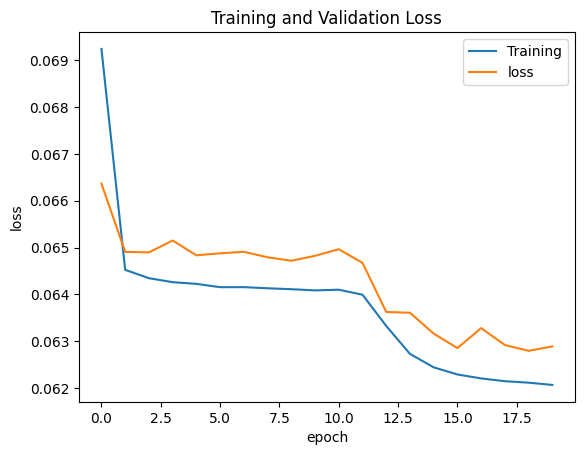

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
plt.plot(training_loss)
plt.plot(validation_loss)
plt.xlabel("epoch")  # add X-axis label
plt.ylabel("loss")# add Y-axis label
plt.legend(["Training","loss"])
plt.title("Training and Validation Loss")  # add title
plt.show()
